# MNIST 데이터셋을 활용한 PCA와 kNN

## MNIST 데이터셋

In [2]:
import pandas as pd

df_train = pd.read_csv('./datas/mnist_train.csv')
df_test = pd.read_csv('./datas/mnist_test.csv')

df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [3]:
df_train.head(3)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 데이터 정리

In [5]:
import numpy as np

x_train = np.array(df_train.iloc[:, 1:])
y_train = np.array(df_train['label'])

x_test = np.array(df_test.iloc[:, 1:])
y_test = np.array(df_test['label'])

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

## 랜덤하게 16개 데이터만 확인

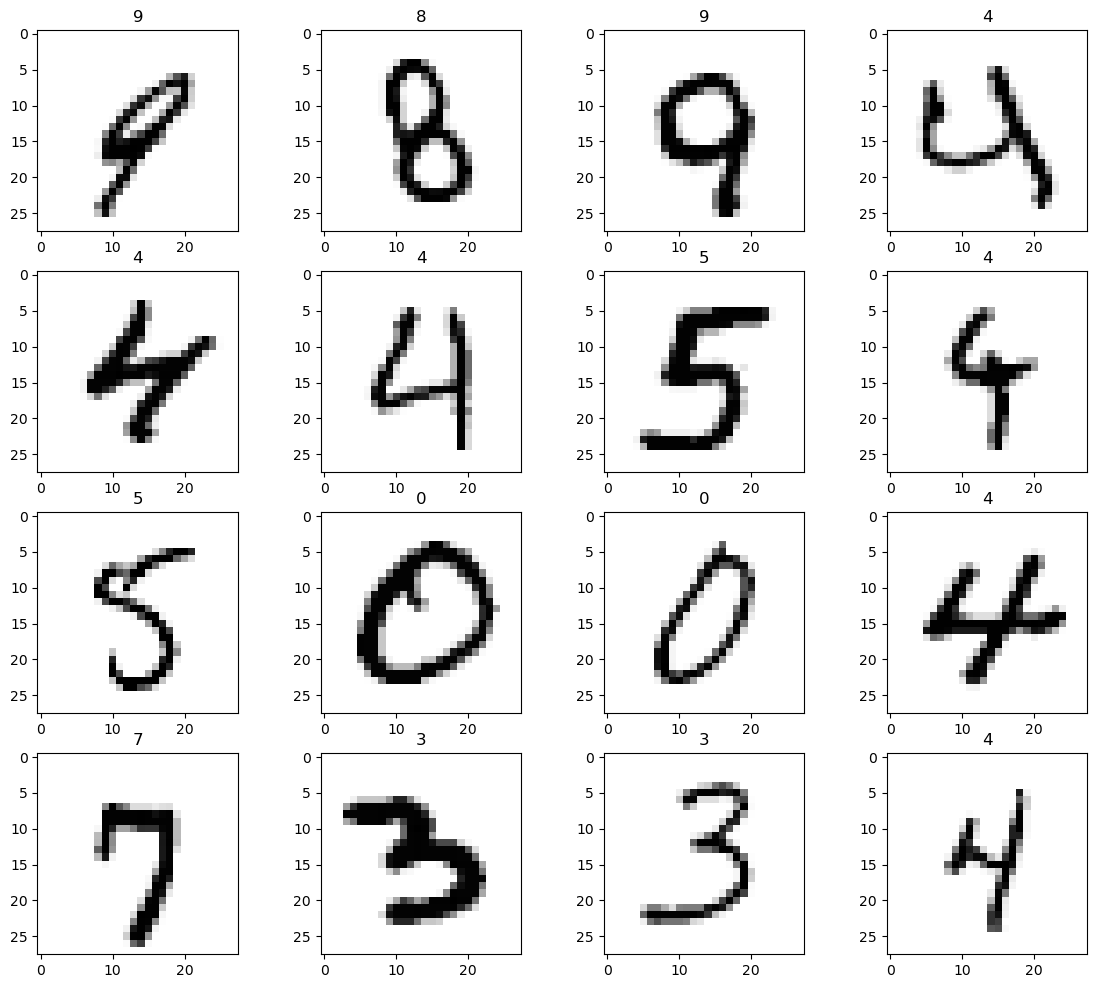

In [7]:
import random
import matplotlib.pyplot as plt

samples = random.choices(population=range(0, 60000), k=16)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples) :
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_train[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.title(y_train[n])

plt.show()

## kNN fit

In [8]:
from sklearn.neighbors import KNeighborsClassifier
import time

start_time = time.time()

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train, y_train)

print('Fit time : ', time.time() - start_time)

Fit time :  0.1211090087890625


In [9]:
from sklearn.metrics import accuracy_score

start_time = time.time()

pred = clf.predict(x_test)

print('Fit time : ', time.time() - start_time)
print(accuracy_score(y_test, pred))

Fit time :  31.138843774795532
0.9688


## PCA로 차원 축소

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipe = Pipeline([
    ('pca', PCA()),
    ('clf', KNeighborsClassifier())
])

parameters = {
    'pca__n_components' : [2, 5, 10],
    'clf__n_neighbors' : [5, 10, 15]
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
grid = GridSearchCV(pipe, parameters, cv=kf, n_jobs=-1, verbose=1)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=13, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'clf__n_neighbors': [5, 10, 15],
                         'pca__n_components': [2, 5, 10]},
             verbose=1)

In [13]:
print("Best score : %0.3f" % grid.best_score_)
print("Best parameters set : ")

best_parameters = grid.best_estimator_.get_params()

for param_name in sorted(parameters.keys()) :
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score : 0.931
Best parameters set : 
	clf__n_neighbors: 10
	pca__n_components: 10


In [15]:
start_time = time.time()

pred = grid.best_estimator_.predict(x_test)
accuracy_score(y_test, pred)

print('Fit time : ', time.time() - start_time)
print(accuracy_score(y_test, pred))

Fit time :  1.0720651149749756
0.9289


## 성능 지표 확인

In [16]:
def results(y_pred, y_test) :
    from sklearn.metrics import classification_report, confusion_matrix
    print(classification_report(y_test, y_pred))

results(grid.predict(x_train), y_train)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5923
           1       0.98      0.99      0.98      6742
           2       0.96      0.96      0.96      5958
           3       0.94      0.90      0.92      6131
           4       0.94      0.93      0.93      5842
           5       0.93      0.94      0.93      5421
           6       0.96      0.98      0.97      5918
           7       0.96      0.95      0.96      6265
           8       0.92      0.91      0.91      5851
           9       0.90      0.91      0.90      5949

    accuracy                           0.95     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.95      0.94     60000



## 모델의 예측이 틀린 데이터 확인

In [39]:
x_test[y_test != pred].shape

(711, 784)

In [35]:
x_test.shape

(10000, 784)

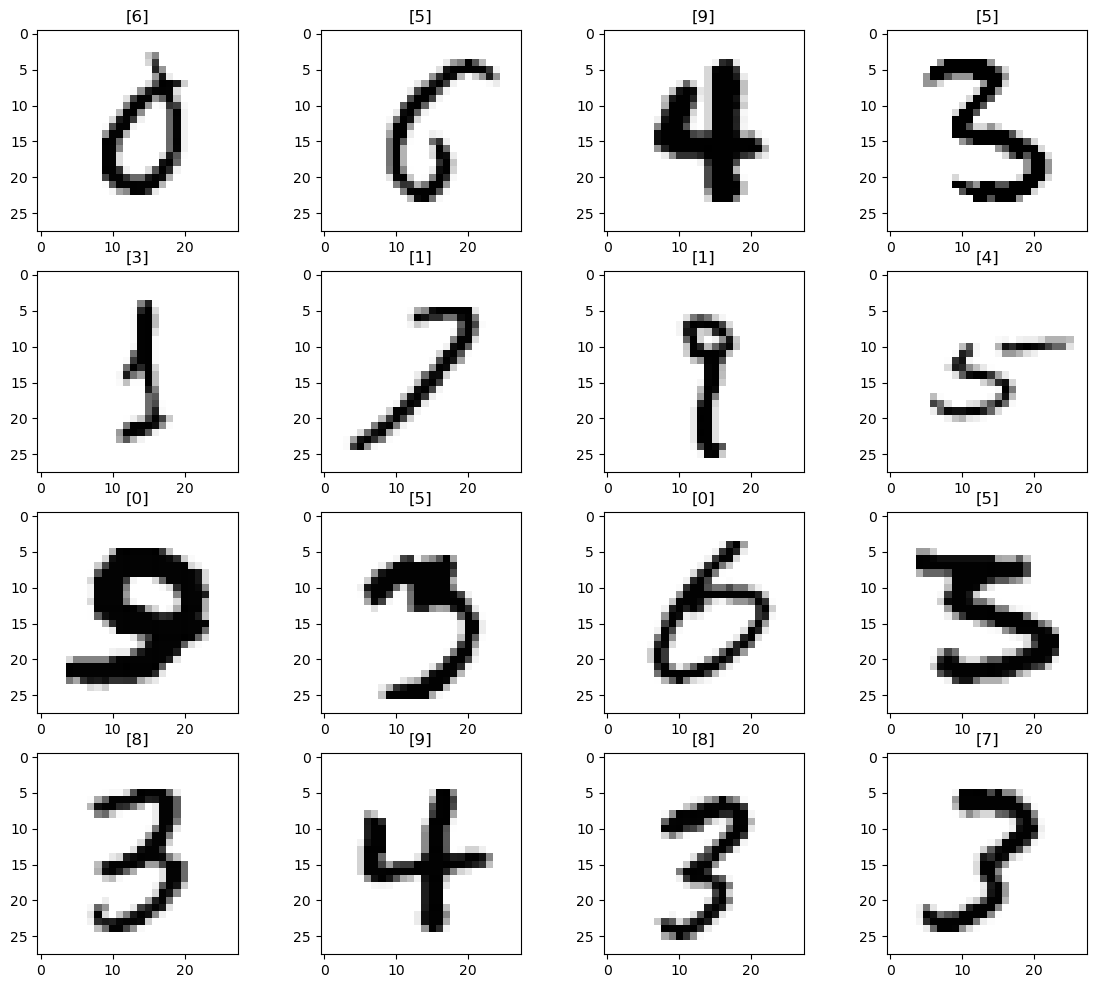

In [ ]:
wrong_results = x_test[y_test != pred]  # 모델의 예측이 틀린 데이터만 가져오기
# 틀린 데이터 중에서 16개만 랜덤하게 확인
samples = random.choices(population=range(0, wrong_results.shape[0]), k=16)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples) :
    plt.subplot(4, 4, idx+1)
    plt.imshow(wrong_results[n].reshape(28, 28), cmap='Greys')
    pred_digit = grid.best_estimator_.predict(wrong_results[n].reshape(1, 784))
    plt.title(str(pred_digit))

plt.show()

In [43]:
wrong_results[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17,
        47,  47,  47,  16, 129,  85,  47,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  75,
       153, 217, 253, 253, 253, 215, 246, 253, 253,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  3

In [45]:
print(x_test[y_test != pred])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
